In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.ops.gen_batch_ops import Batch
from tensorflow.keras.regularizers import l1_l2

2024-10-21 15:11:22.938550: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 15:11:23.049275: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 15:11:23.049292: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 15:11:23.049896: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 15:11:23.092183: I tensorflow/core/platform/cpu_feature_g

**Running tests on the 13 latent features extracted without applying PCA**

In [2]:
X_13 = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/13_latent_X.csv')
y_13 = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Gleason_Scores.csv')

In [3]:
X_13.drop('Unnamed: 0', axis = 1, inplace = True)
y_13.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
X_13

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.099633,2.105071,4.861546,1.201062,1.031912,2.276838,0.0,1.958306,0.0,2.132879,4.927852,3.389273,0.0
1,4.394530,1.491024,4.633244,1.322756,1.280498,0.655486,0.0,1.165946,0.0,1.597877,3.526757,2.962063,0.0
2,2.846981,1.476024,4.533834,1.592871,1.536822,2.504034,0.0,1.904280,0.0,0.728638,3.857053,2.580591,0.0
3,3.067574,1.429004,5.242934,1.838206,1.546708,2.926856,0.0,1.900046,0.0,1.008405,4.477023,3.414979,0.0
4,3.214899,1.207983,4.899215,1.441559,2.005886,2.562202,0.0,1.749290,0.0,0.353448,2.871145,2.061730,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,1.944719,0.915589,4.315665,1.593531,1.536410,3.161861,0.0,1.590570,0.0,0.064122,2.831939,1.833311,0.0
286,3.352586,1.449966,5.232137,1.512709,1.478698,2.485846,0.0,1.839456,0.0,1.321241,4.266604,3.296337,0.0
287,2.647565,1.544407,4.800531,1.838045,1.290312,2.835737,0.0,1.859061,0.0,1.010842,4.215125,2.976325,0.0
288,3.485683,1.374207,5.253157,1.617933,1.357864,2.266077,0.0,1.591797,0.0,1.400602,4.281725,3.513130,0.0


In [5]:
y_13

,Gleason_Score
0,1
1,1
2,0
3,0
4,1
...,...
285,0
286,0
287,1
288,0


In [6]:
from sklearn.model_selection import train_test_split
X_train_13, X_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size = 0.33, random_state = 42)
X_test_13, X_val_13, y_test_13, y_val_13 = train_test_split(X_test_13, y_test_13, test_size = 0.33, random_state = 42)

In [7]:
X_train_13.shape, y_train_13.shape

((194, 13), (194, 1))

In [8]:
X_test_13.shape, y_test_13.shape

((64, 13), (64, 1))

In [9]:
#ANN
from tensorflow.keras.regularizers import l2
input_layer = Input(shape = (X_train_13.shape[1], ))
x = Dense(128, activation = 'relu')(input_layer)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(32, activation = 'relu')(x)
x = Dropout(0.1)(x)
output_layer = Dense(1, activation = 'sigmoid')(x)
ann_model = Model(input_layer, output_layer)
ann_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

2024-10-21 15:11:36.783772: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-21 15:11:36.889042: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-21 15:11:36.889166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
ann_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [11]:
#Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lrs = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.00001, patience = 10, min_lr = 1e-6)
es = EarlyStopping(monitor = 'val_loss', patience = 10)

In [12]:
history_1 = ann_model.fit(X_train_13, y_train_13, validation_data = (X_test_13, y_test_13), epochs = 100, callbacks = [lrs, es])

Epoch 1/100


2024-10-21 15:11:48.123422: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-21 15:11:49.112264: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7136acb85240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-21 15:11:49.112284: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-10-21 15:11:49.116131: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-21 15:11:49.127687: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-10-21 15:11:49.178013: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 [==============================] - 2s 22ms/step - loss: 0.7590 - accuracy: 0.4588 - val_loss: 0.6961 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.5619 - val_loss: 0.6971 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6300 - accuracy: 0.6598 - val_loss: 0.6908 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.6443 - val_loss: 0.6855 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6031 - val_loss: 0.6803 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6275 - accuracy: 0.6186 - val_loss: 0.6769 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.6134 - 

**Using recursive feature elimination with feature wrapper**

In [13]:
#Testing out the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rfc = RandomForestClassifier()
rfe = RFE(estimator = rfc, n_features_to_select = 5)
rfe.fit(X_train_13, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packag

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [14]:
print(f'Feature rank: {rfe.ranking_}')
print(f'Top features: {X_train_13.columns[rfe.support_]}')

Feature rank: [2 5 1 1 1 6 9 1 8 3 1 4 7]
Top features: Index(['2', '3', '4', '7', '10'], dtype='object')


In [15]:
X_train_rfe = rfe.transform(X_train_13)
X_val_rfe = rfe.transform(X_val_13)
X_test_rfe = rfe.transform(X_test_13)

In [16]:
X_train_rfe.shape

(194, 5)

In [17]:
rfc.fit(X_train_rfe, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [18]:
print(classification_report(y_val_13, rfc.predict(X_val_rfe)))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.60      0.88      0.71        17

    accuracy                           0.62        32
   macro avg       0.66      0.61      0.58        32
weighted avg       0.65      0.62      0.59        32



In [20]:
print(classification_report(y_test_13, rfc.predict(X_test_rfe)))

              precision    recall  f1-score   support

           0       0.65      0.50      0.57        34
           1       0.55      0.70      0.62        30

    accuracy                           0.59        64
   macro avg       0.60      0.60      0.59        64
weighted avg       0.61      0.59      0.59        64



In [26]:
y_test_13.value_counts()

Gleason_Score
0                34
1                30
Name: count, dtype: int64

Text(95.72222222222221, 0.5, 'Predicted Label')

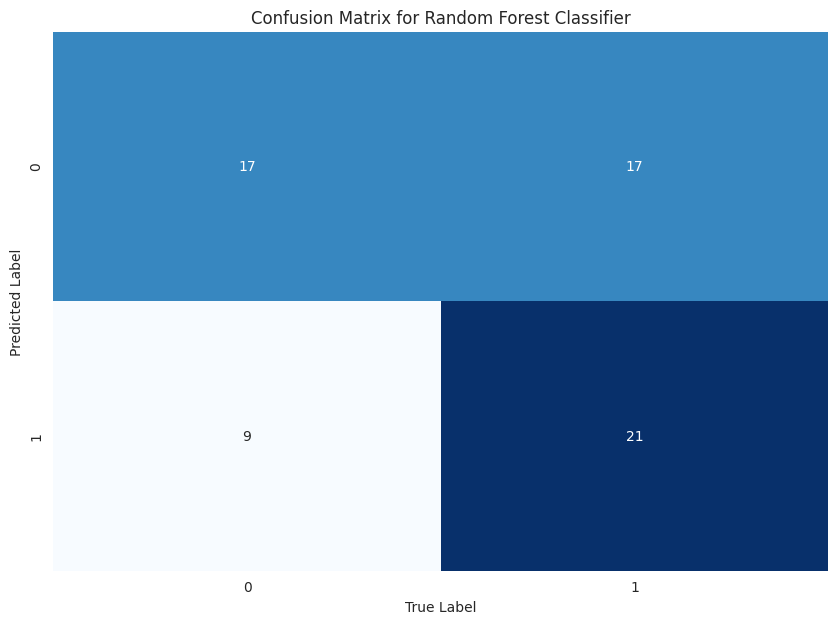

In [30]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_13, rfc.predict(X_test_rfe))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# **Feature selection using Recursive Feature Eliminator (RFE) technique**
It is a feature wrapper technique which iteratively chooses all possible combinatorial subset of features from the dataset and ranks the features based on their contribution to the prediction of the Gleason score. The following comprehensive tests have been performed:

1. Using just one input feature as predictor gave a validation accuracy of 50%
2. Using 2, 4, 8 and 10 features yielded 59% validation accuracy
3. Using 3 and 9 features resulted in 56% validation accuracy
4. Using 5 and all features (13) gave 69% validation accuracy
5. Using 6, 11 and 12 features gave 62% validation accuracy
6. Using 7 features gave 64% validation accuracy

**Since using 5 features results in the least no of computations and highest validation accuracy, 5 features were chosen**


In [33]:
#Using only the features [2, 4, 7, 9 and 10]
X_train = X_train_13[['2', '4', '7', '9', '10']]
X_test = X_test_13[['2', '4', '7', '9', '10']]
X_val = X_val_13[['2', '4', '7', '9', '10']]

**Note: From the above feature ranks it was evident that 2, 4, 7, 9 and 10 are the most significantly contributing features ,and they have the lowest ranks (1) which indicate the most vital features.**

In [34]:
X_train

,2,4,7,9,10
184,6.135409,2.117820,1.037778,0.786942,2.570968
232,4.714121,1.919170,1.060741,0.250589,2.102296
38,4.632814,1.849033,2.286310,0.763380,4.068241
178,4.492625,1.444730,2.020933,0.753599,3.917394
170,4.592948,1.756269,2.191901,1.004540,4.086789
...,...,...,...,...,...
188,4.572306,1.342985,1.852130,0.694334,4.097106
71,5.278417,1.582679,1.534595,1.585902,3.956474
106,5.145191,1.242844,1.186918,1.740403,3.758870
270,4.074615,1.036103,1.995274,1.255049,4.405115


In [35]:
X_test

,2,4,7,9,10
15,5.312999,1.393442,1.789183,1.857458,4.724019
125,5.107173,0.998116,1.560883,1.827410,4.573071
180,4.455038,1.789094,2.087752,1.146413,3.831013
119,4.501893,2.008139,0.978763,0.640666,1.371113
165,4.874878,0.807901,1.396503,1.390021,4.632435
...,...,...,...,...,...
223,4.909243,1.732794,2.004662,1.277376,4.076252
10,4.582076,1.750962,1.647382,0.359396,2.785755
218,5.062508,1.842111,1.829901,0.631552,3.601160
97,5.285318,1.619579,1.544240,1.196564,3.550518


In [36]:
X_val

,2,4,7,9,10
67,5.116442,1.423162,1.366956,1.512774,3.580170
287,4.800531,1.290312,1.859061,1.010842,4.215125
68,6.079992,1.577895,0.978838,1.741999,3.666011
212,5.021482,1.693285,1.540695,0.928060,3.629627
117,5.349797,1.594493,1.625006,1.082490,3.930889
262,5.900863,1.550730,1.284157,0.600569,3.416085
93,6.746623,1.532774,0.890639,1.666480,3.982067
267,5.269382,1.356170,1.714668,1.697035,4.577945
84,3.188369,0.229596,1.189793,1.790315,3.711994
147,5.274270,1.397584,1.490384,1.475544,4.189394


In [37]:
#Testing out a neural network on these features
tf.random.set_seed(42)
#Model-1
nn_input_layer_1 = Input(shape = (X_train.shape[1], ))
x = Dense(1024, activation = 'relu')(nn_input_layer_1)
x = BatchNormalization(momentum = 0.8)(x)
x = Dense(512, activation = 'relu')(x)
x = BatchNormalization(momentum = 0.8)(x)
x = Dropout(0.1)(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization(momentum = 0.8)(x)
x = Dense(128, activation = 'relu')(x)
x = BatchNormalization(momentum = 0.8)(x)
nn_output_layer_1 = Dense(1, activation = 'sigmoid')(x)
nn_model_1 = Model(nn_input_layer_1, nn_output_layer_1) # This config yielded 73.71% training acc, 68.75% val acc in 23 epochs & 56% test acc
#Model-2
nn_input_layer_2 = Input(shape = (X_train.shape[1], ))
y = Dense(1024, activation = 'relu')(nn_input_layer_2)
y = BatchNormalization(momentum = 0.5)(y)
y = Dense(512, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.5)(y)
y = Dense(256, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.5)(y)
y = Dropout(0.1)(y)
y = Dense(128, activation = 'relu')(y)
y = Dropout(0.1)(y)
y = Dense(64, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.6)(y)
y = Dense(32, activation = 'relu')(y)
y = Dropout(0.1)(y)
y = BatchNormalization(momentum = 0.7)(y)
y = Dense(16, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.8)(y)
y = Dropout(0.1)(y)
y = Dense(16, activation = 'relu')(y)
y = BatchNormalization(momentum = 0.9)(y)
y = Dense(16, activation = 'relu')(y)
nn_output_layer_2 = Dense(1, activation = 'sigmoid')(y)
nn_model_2 = Model(nn_input_layer_2, nn_output_layer_2) # This config yielded 60.31% train acc, 71.88% val acc in 39 epochs

nn_input_layer_3 = Input(shape = (X_train.shape[1], ))
z = Dense(1024, activation = 'relu')(nn_input_layer_3)
z = BatchNormalization(momentum = 0.8)(z)
z = Dense(512, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.8)(z)
z = Dense(256, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.8)(z)
z = Dropout(0.1)(z)
z = Dense(128, activation = 'relu')(z)
z = Dropout(0.1)(z)
z = Dense(64, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.8)(z)
z = Dense(32, activation = 'relu')(z)
z = Dropout(0.1)(z)
z = BatchNormalization(momentum = 0.9)(z)
z = Dense(16, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.99)(z)
z = Dropout(0.1)(z)
z = Dense(16, activation = 'relu')(z)
z = BatchNormalization(momentum = 0.99)(z)
z = Dense(16, activation = 'relu')(z)
nn_output_layer_3 = Dense(1, activation = 'sigmoid')(z) 
nn_model_3 = Model(nn_input_layer_3, nn_output_layer_3) # This config gives the most stable ANN model train acc: 67.01%, val acc: 65.62% test acc: 64% 
'''nn_input_layer = Input(shape = (X_train.shape[1], ))
x = Dense(1024, kernel_regularizer = l2(0.01))(nn_input_layer)
x = BatchNormalization(momentum = 0.8)(x)
x = Activation('relu')(x)
x = Dense(512, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.8)(x)
x = Activation('relu')(x)
x = Dense(256, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.9)(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)
x = Dense(128, activation = 'relu', kernel_regularizer = l2(0.001))(x)
x = Dropout(0.1)(x)
x = Dense(64, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.9)(x)
x = Activation('relu')(x)
x = Dense(32, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.9)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.99)(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)
x = Dense(16, kernel_regularizer = l2(0.01))(x)
x = BatchNormalization(momentum = 0.99)(x)
x = Activation('relu')(x)
x = Dense(16, activation = 'relu')(x)
nn_output_layer = Dense(1, activation = 'sigmoid')(x) 
nn_model = Model(nn_input_layer, nn_output_layer)''' # Using this strategy and applying it to a simple model
nn_input_layer_4 = Input(shape = (X_train.shape[1], ))
a = Dense(256)(nn_input_layer_4)
a = BatchNormalization(momentum = 0.8)(a)
a = Activation('relu')(a)
a = Dense(128)(a)
a = BatchNormalization(momentum = 0.8)(a)
a = Activation('relu')(a)
a = Dense(64)(a)
a = BatchNormalization(momentum = 0.8)(a)
a = Activation('relu')(a)
a = Dense(32)(a)
a = BatchNormalization(momentum = 0.9)(a)
a = Activation('relu')(a)
a = Dense(16)(a)
a = BatchNormalization(momentum = 0.9)(a)
a = Activation('relu')(a)
a = Dense(16)(a)
a = BatchNormalization(momentum = 0.99)(a)
a = Activation('relu')(a)
a = Dense(16)(a)
a = BatchNormalization(momentum = 0.99)(a)
a = Activation('relu')(a)
nn_output_layer_4 = Dense(1, activation = 'sigmoid')(a)
nn_model_4 = Model(nn_input_layer_4, nn_output_layer_4) # 68% and 62.5%
nn_model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_29 (Dense)            (None, 256)               1536      
                                                                 
 batch_normalization_19 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_20 (Ba  (None, 128)               512       
 tchNormalization)                                         

In [38]:
nn_model_1.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
nn_model_2.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
nn_model_3.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
nn_model_4.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [39]:
history_nn_1 = nn_model_1.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 100, callbacks = [lrs, es])

Epoch 1/100
7/7 [==============================] - 1s 21ms/step - loss: 0.9863 - accuracy: 0.5619 - val_loss: 0.6470 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7331 - accuracy: 0.6082 - val_loss: 0.7516 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7013 - accuracy: 0.5876 - val_loss: 0.7105 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6204 - accuracy: 0.6495 - val_loss: 0.5948 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.6546 - val_loss: 0.5961 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5697 - accuracy: 0.6856 - val_loss: 0.7015 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5775 - accurac

In [40]:
history_nn_2 = nn_model_2.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 100, callbacks = [lrs, es])

Epoch 1/100
7/7 [==============================] - 2s 28ms/step - loss: 0.7597 - accuracy: 0.5258 - val_loss: 0.6776 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6509 - accuracy: 0.6186 - val_loss: 0.8331 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7007 - accuracy: 0.5619 - val_loss: 0.8453 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.5670 - val_loss: 0.6997 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6574 - accuracy: 0.6237 - val_loss: 0.6224 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6499 - accuracy: 0.6289 - val_loss: 0.7163 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6634 - accurac

In [41]:
history_nn_3 = nn_model_3.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 100, callbacks = [lrs, es])

Epoch 1/100
7/7 [==============================] - 2s 25ms/step - loss: 0.7571 - accuracy: 0.5619 - val_loss: 0.6899 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7562 - accuracy: 0.5155 - val_loss: 0.6922 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7153 - accuracy: 0.5619 - val_loss: 0.6720 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.7082 - accuracy: 0.5773 - val_loss: 0.6785 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7349 - accuracy: 0.5773 - val_loss: 0.6114 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6442 - accuracy: 0.6134 - val_loss: 0.5968 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6791 - accurac

In [42]:
history_nn_4 = nn_model_4.fit(X_train, y_train_13, validation_data = (X_val, y_val_13), epochs = 100, callbacks = [lrs, es])

Epoch 1/100
7/7 [==============================] - 2s 24ms/step - loss: 0.8440 - accuracy: 0.4794 - val_loss: 0.6907 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7206 - accuracy: 0.5567 - val_loss: 0.6679 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6954 - accuracy: 0.5825 - val_loss: 0.6547 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6752 - accuracy: 0.5876 - val_loss: 0.6496 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6315 - accuracy: 0.5825 - val_loss: 0.6791 - val_accuracy: 0.5312 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6340 - accuracy: 0.6443 - val_loss: 0.6701 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6306 - accurac

In [43]:
#Classification report for ANN-1 for validation set
print(classification_report(y_val_13, tf.round(nn_model_1.predict(X_val))))

1/1 [==============================] - 0s 66ms/step
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.71      0.71      0.71        17

    accuracy                           0.69        32
   macro avg       0.69      0.69      0.69        32
weighted avg       0.69      0.69      0.69        32



1/1 [==============================] - 0s 18ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

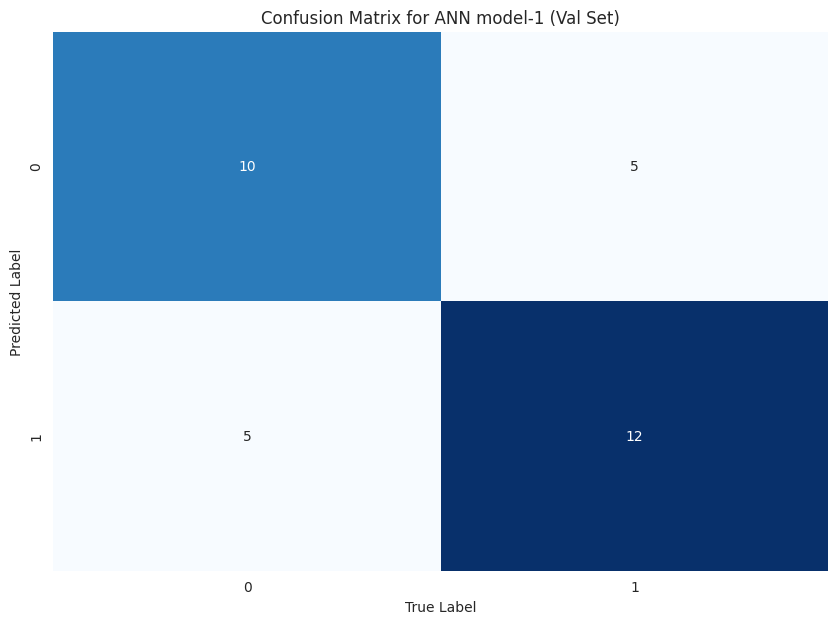

In [47]:
#Confusion Matrix for ANN-1 for Validation Set
cm_rfc = confusion_matrix(y_val_13, tf.round(nn_model_1.predict(X_val)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-1 (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [44]:
#Classification report for ANN-1 for test set
print(classification_report(y_test_13, tf.round(nn_model_1.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        34
           1       0.45      0.43      0.44        30

    accuracy                           0.48        64
   macro avg       0.48      0.48      0.48        64
weighted avg       0.48      0.48      0.48        64



2/2 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

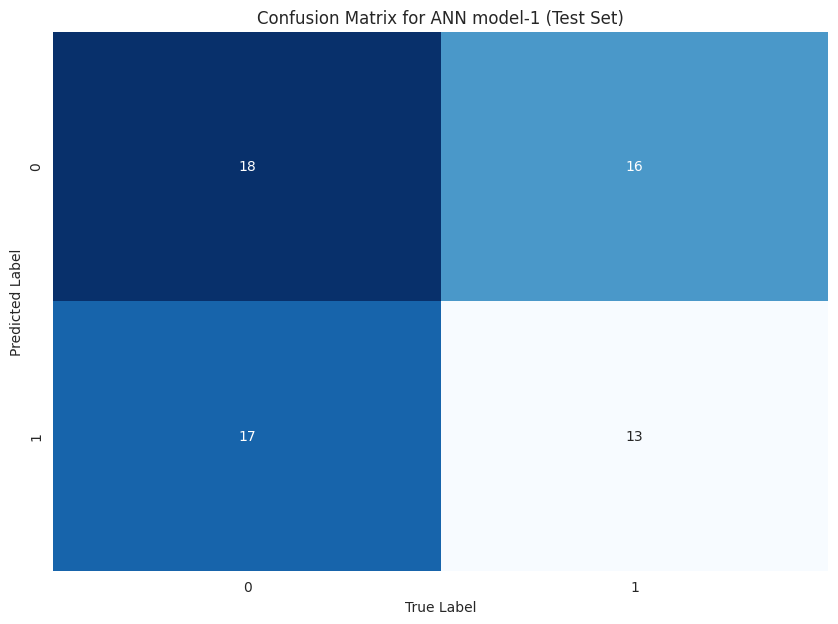

In [48]:
#Confusion matrix for ANN-1 Test Set
cm_rfc = confusion_matrix(y_test_13, tf.round(nn_model_1.predict(X_test)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-1 (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [52]:
#Classification report for ANN Model-2 Val Set
print(classification_report(y_val_13, tf.round(nn_model_2.predict(X_val))))

1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       0.90      0.53      0.67        17

    accuracy                           0.72        32
   macro avg       0.77      0.73      0.71        32
weighted avg       0.78      0.72      0.71        32



1/1 [==============================] - 0s 22ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

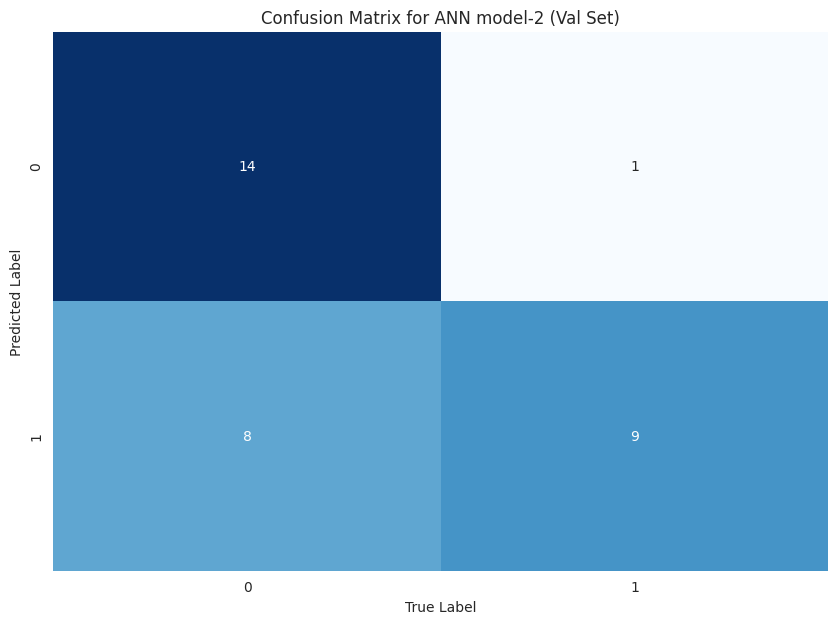

In [55]:
#Confusion Matrix for ANN Model-2 Val Set
cm_rfc = confusion_matrix(y_val_13, tf.round(nn_model_2.predict(X_val)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-2 (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [56]:
#Classification report for ANN Model-2 Test Set
print(classification_report(y_test_13, tf.round(nn_model_2.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.52      0.76      0.62        34
           1       0.43      0.20      0.27        30

    accuracy                           0.50        64
   macro avg       0.47      0.48      0.45        64
weighted avg       0.48      0.50      0.46        64



2/2 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

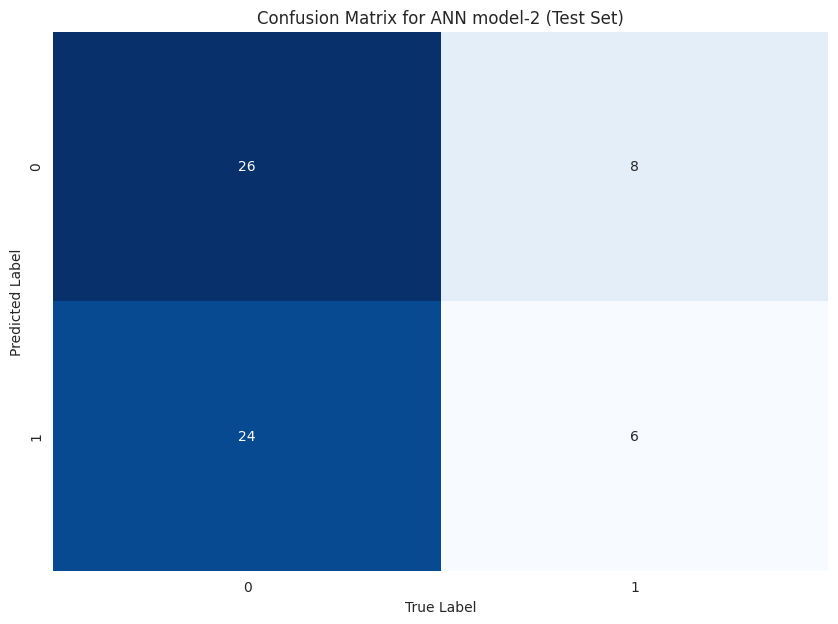

In [57]:
#Confusion Matrix for ANN Model-2 Test Set
cm_rfc = confusion_matrix(y_test_13, tf.round(nn_model_2.predict(X_test)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-2 (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [58]:
#Classification report for model-3 Val Set
print(classification_report(y_val_13, tf.round(nn_model_3.predict(X_val))))

1/1 [==============================] - 0s 89ms/step
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        15
           1       0.67      0.71      0.69        17

    accuracy                           0.66        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.66      0.66      0.66        32



1/1 [==============================] - 0s 20ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

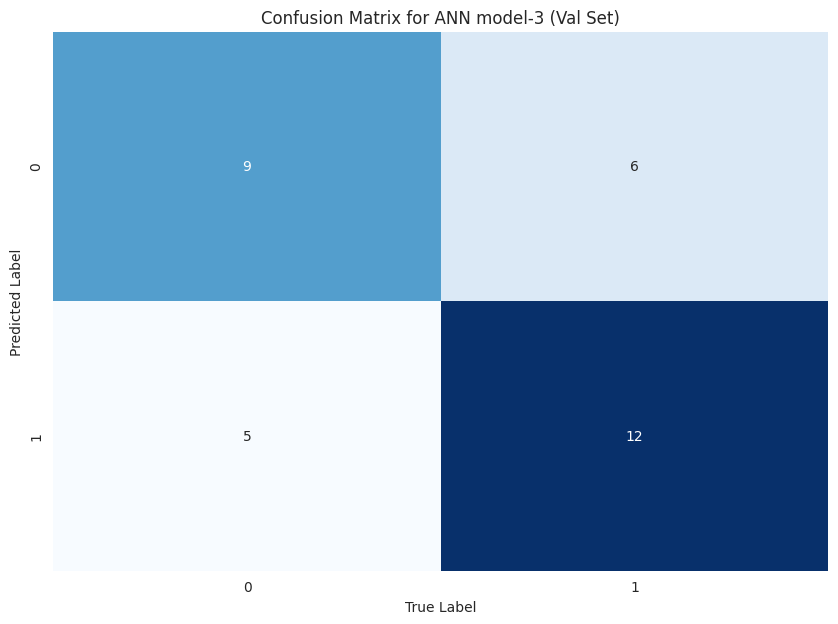

In [59]:
# Confusion Matrix for model-3 Val Set
cm_rfc = confusion_matrix(y_val_13, tf.round(nn_model_3.predict(X_val)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-3 (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [60]:
#Classification report for ANN model-3 Test Set
print(classification_report(y_test_13, tf.round(nn_model_3.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        34
           1       0.52      0.53      0.52        30

    accuracy                           0.55        64
   macro avg       0.55      0.55      0.55        64
weighted avg       0.55      0.55      0.55        64



2/2 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

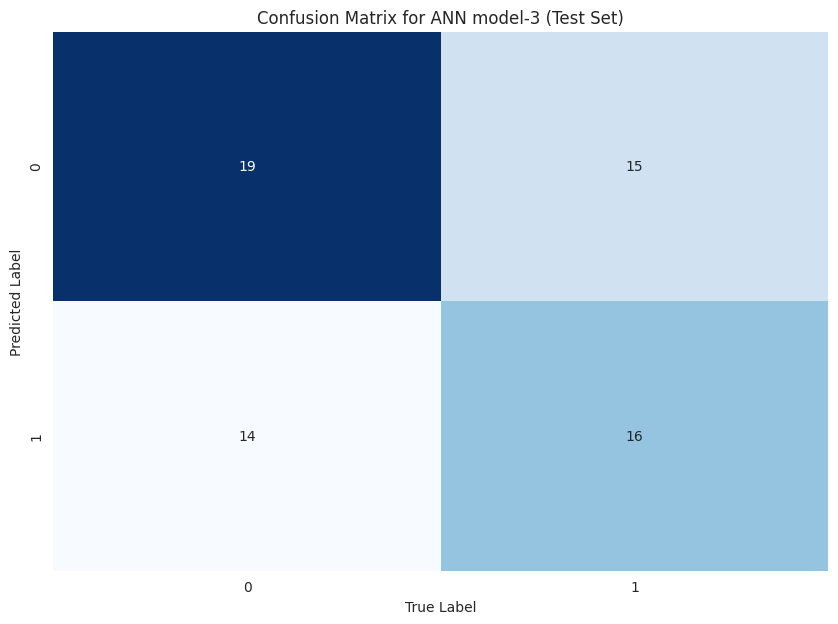

In [61]:
#Confusion matrix for ANN model-3 Test Set
cm_rfc = confusion_matrix(y_test_13, tf.round(nn_model_3.predict(X_test)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-3 (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [62]:
#Classification report for ANN model-4 Val Set
print(classification_report(y_val_13, tf.round(nn_model_4.predict(X_val))))

1/1 [==============================] - 0s 84ms/step
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        15
           1       0.58      0.88      0.70        17

    accuracy                           0.59        32
   macro avg       0.62      0.57      0.54        32
weighted avg       0.62      0.59      0.55        32



1/1 [==============================] - 0s 12ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

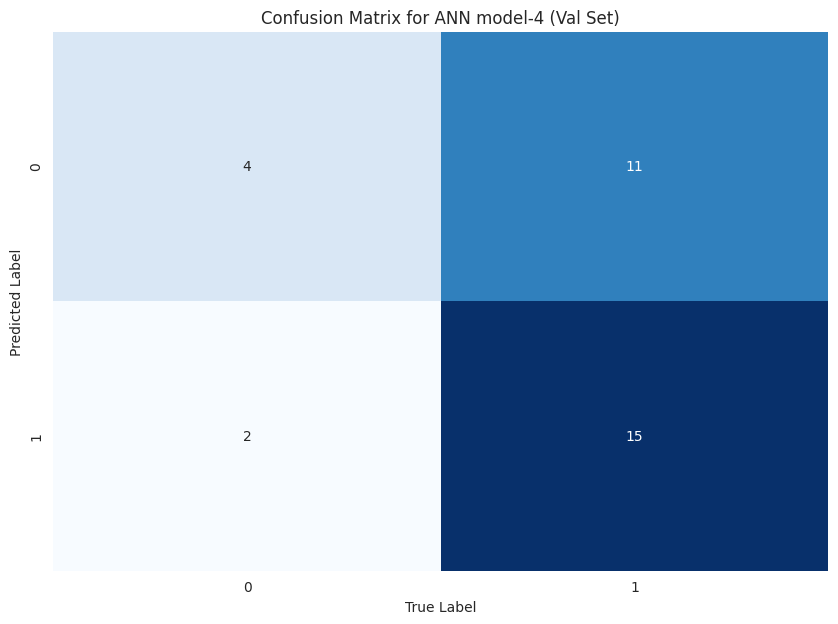

In [63]:
#Confusion Matrix for model-4 Val Set
cm_rfc = confusion_matrix(y_val_13, tf.round(nn_model_4.predict(X_val)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-4 (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [64]:
#Classification report for ANN model-4 Test Set
print(classification_report(y_test_13, tf.round(nn_model_4.predict(X_test))))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.66      0.56      0.60        34
           1       0.57      0.67      0.62        30

    accuracy                           0.61        64
   macro avg       0.61      0.61      0.61        64
weighted avg       0.62      0.61      0.61        64



2/2 [==============================] - 0s 3ms/step


Text(95.72222222222221, 0.5, 'Predicted Label')

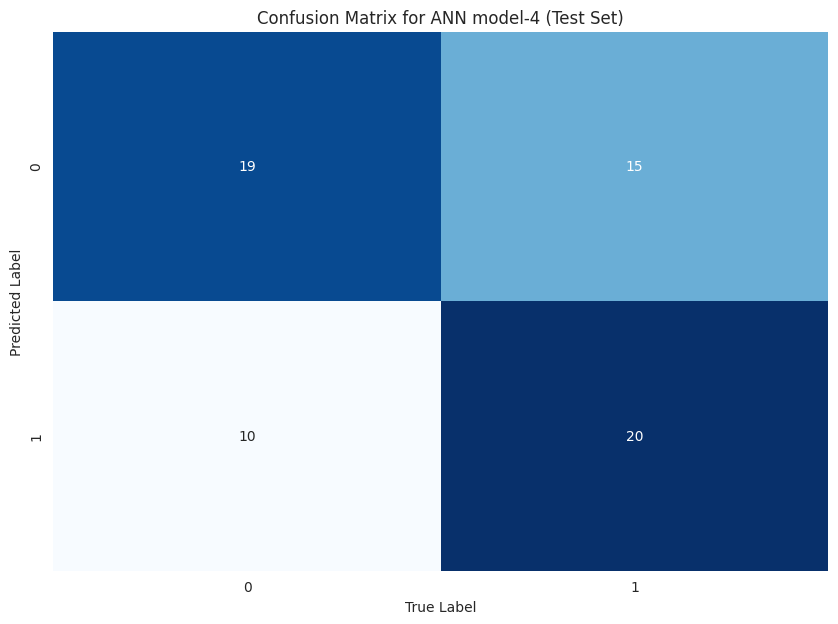

In [65]:
#Confusion Matrix for ANN model-4 Test Set
cm_rfc = confusion_matrix(y_test_13, tf.round(nn_model_4.predict(X_test)))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for ANN model-4 (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [66]:
#XGBoost classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train_13)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
#XGBoost Classifier classification report Val Set
print(classification_report(y_val_13, xgbc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        15
           1       0.55      0.71      0.62        17

    accuracy                           0.53        32
   macro avg       0.52      0.52      0.51        32
weighted avg       0.52      0.53      0.51        32



Text(95.72222222222221, 0.5, 'Predicted Label')

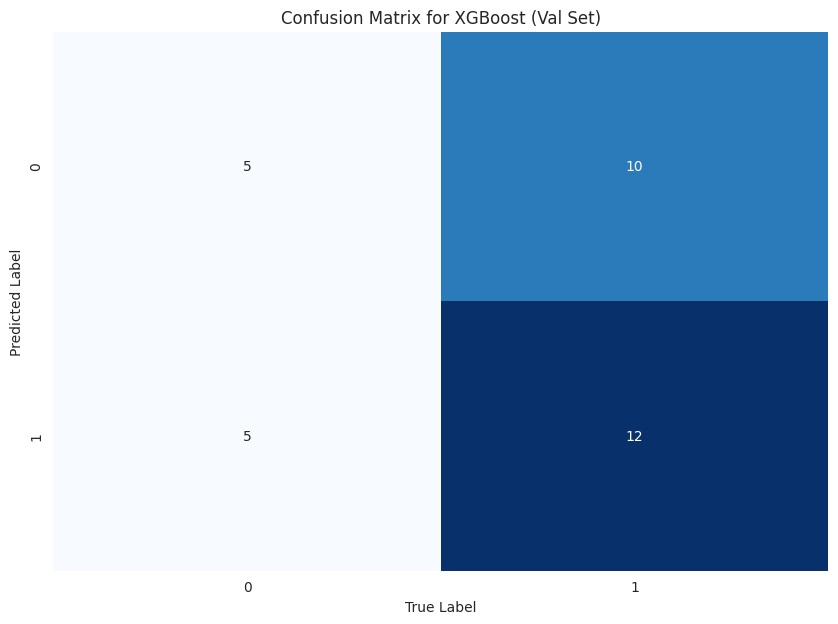

In [68]:
#Confusion Matrix for XGBoost Classifier Val Set
cm_rfc = confusion_matrix(y_val_13, xgbc.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for XGBoost (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [69]:
#XGBoost Classification Report Test Set
print(classification_report(y_test_13, xgbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63        34
           1       0.60      0.70      0.65        30

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.65      0.64      0.64        64



Text(95.72222222222221, 0.5, 'Predicted Label')

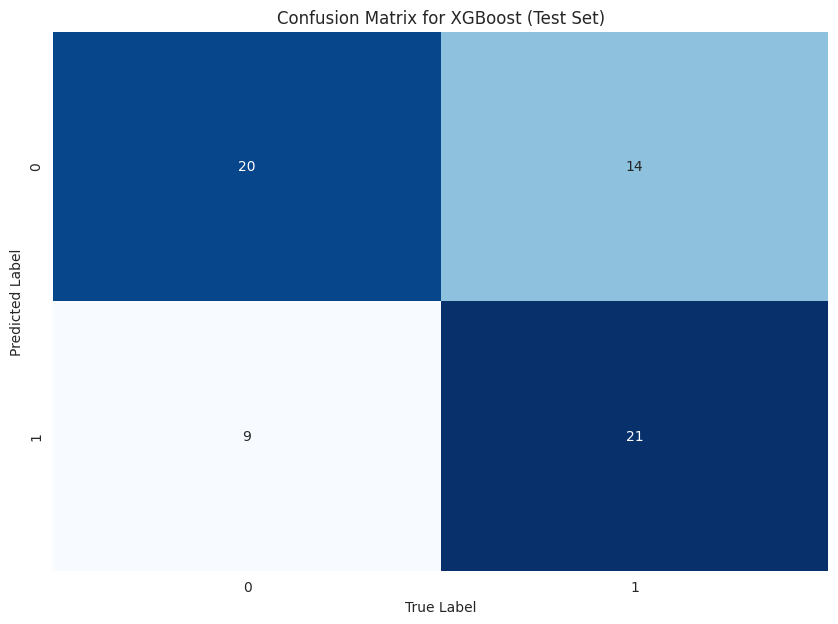

In [70]:
#XGBoost Confusion Matrix Test Set
cm_rfc = confusion_matrix(y_test_13, xgbc.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for XGBoost (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [72]:
#Hyperparameter tuning for xgboost classifier
param_grid = {
    'n_estimators': [25, 50, 100, 250, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0, 1.2, 1.4],
    'colsample_bytree': [0.6, 0.8, 1.0, 1.2, 1.4]
}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(estimator = xgbc, param_grid = param_grid, scoring = 'accuracy', n_jobs = -1, cv = 5)

In [73]:
gscv.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
36000 fits failed out of a total of 56250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6750 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/pyth

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0, 1.2, 1.4],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_child_weight': [1, 3, 5, 7, 9],
                         'n_estimators': [25, 50, 100, 250, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0, 1.2, 1.4]},
             scoring='accuracy')

In [74]:
print(f'Best parameters for XGBoost classifier are: {gscv.best_params_}')

Best parameters for XGBoost classifier are: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 25, 'subsample': 1.0}


In [75]:
xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 3, min_child_weight = 1, n_estimators = 25, subsample = 1.0)

In [76]:
xgb.fit(X_train, y_train_13)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
#Tuned XGBoost classification report Val Set
print(classification_report(y_val_13, xgb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.67      0.27      0.38        15
           1       0.58      0.88      0.70        17

    accuracy                           0.59        32
   macro avg       0.62      0.57      0.54        32
weighted avg       0.62      0.59      0.55        32



Text(95.72222222222221, 0.5, 'Predicted Label')

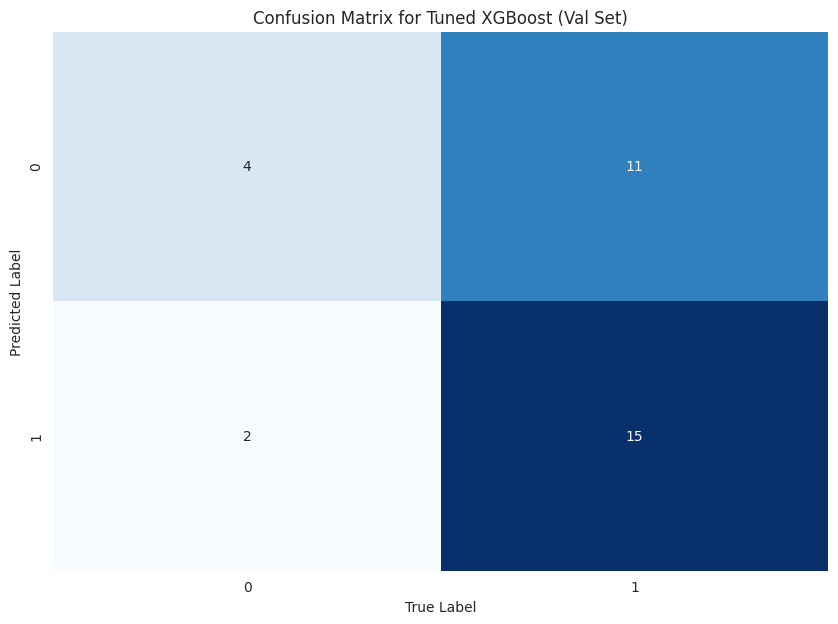

In [78]:
#Tuned XGBoost Confusion Matrix Val Set
cm_rfc = confusion_matrix(y_val_13, xgb.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned XGBoost (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [79]:
#Tuned XGBoost classification report Test Set
print(classification_report(y_test_13, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62        34
           1       0.60      0.80      0.69        30

    accuracy                           0.66        64
   macro avg       0.68      0.66      0.65        64
weighted avg       0.68      0.66      0.65        64



Text(95.72222222222221, 0.5, 'Predicted Label')

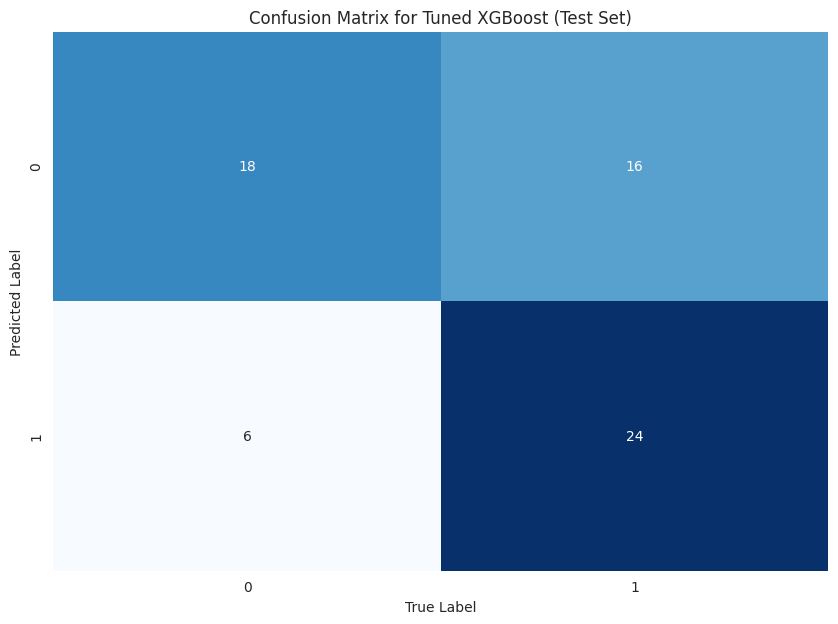

In [80]:
#Tuned XGBoost Confusion Matrix Test Set
cm_rfc = confusion_matrix(y_test_13, xgb.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned XGBoost (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [82]:
#Classification report Logistic Regression Val Set
print(classification_report(y_val_13, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.57      0.71      0.63        17

    accuracy                           0.56        32
   macro avg       0.56      0.55      0.55        32
weighted avg       0.56      0.56      0.55        32



Text(95.72222222222221, 0.5, 'Predicted Label')

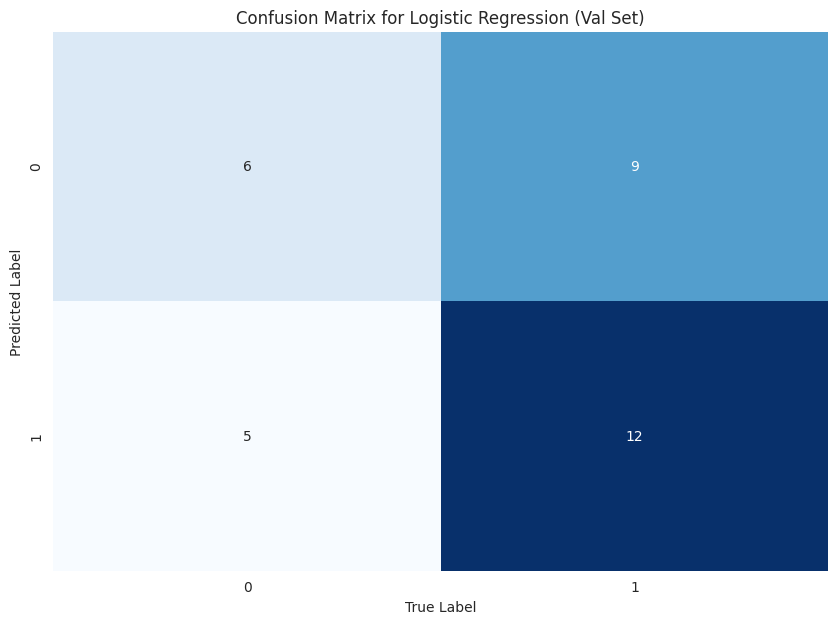

In [83]:
#Confusion matrix Logistic Regression Val Set
cm_rfc = confusion_matrix(y_val_13, lr.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Logistic Regression (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [84]:
#Classification report Logistic Regression Test Set
print(classification_report(y_test_13, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.54      0.63      0.58        30

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64



Text(95.72222222222221, 0.5, 'Predicted Label')

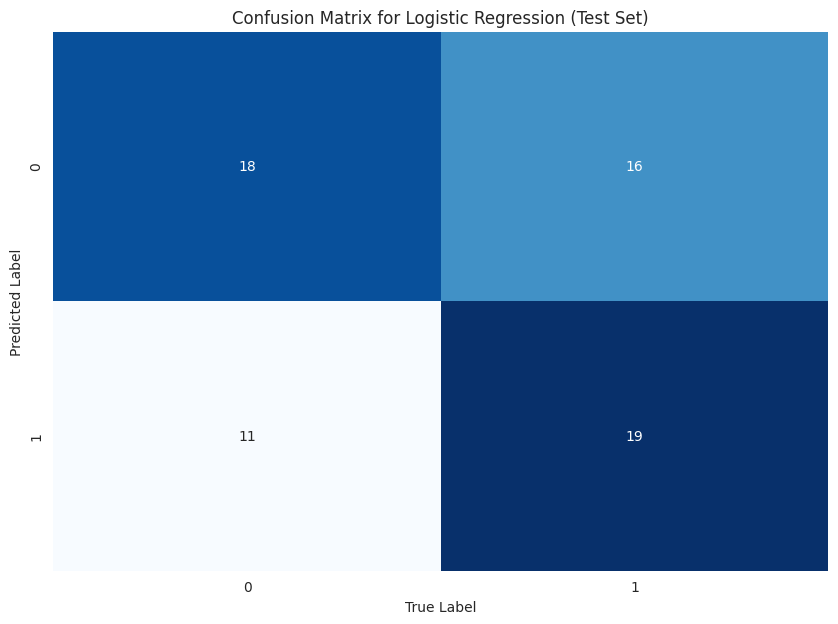

In [85]:
#Confusion Matrix Logistic Regression Test Set
cm_rfc = confusion_matrix(y_test_13, lr.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Logistic Regression (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [86]:
lr_2 = LogisticRegression()

In [90]:
#Hyperparameter Tuning For Logistic Regression
lr_param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.001, 0.01, 1.0, 10.0, 100.0], 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [5, 10, 20, 25, 50, 75, 100, 250, 500, 1000]}
gscv_lr = GridSearchCV(estimator = lr_2, param_grid = lr_param_grid, cv = 3, n_jobs = -1)
gscv_lr.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/skl

GridSearchCV(cv=3,
             estimator=LogisticRegression(C=100.0, max_iter=5, penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 1.0, 10.0, 100.0],
                         'max_iter': [5, 10, 20, 25, 50, 75, 100, 250, 500,
                                      1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [91]:
print(f'Best Params for Logistic Regression: {gscv_lr.best_params_}')

Best Params for Logistic Regression: {'C': 1.0, 'max_iter': 5, 'penalty': 'l1', 'solver': 'liblinear'}


In [92]:
lr_2 = LogisticRegression(C = 1.0, max_iter = 5, penalty = 'l1', solver = 'liblinear')
lr_2.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=5, penalty='l1', solver='liblinear')

In [93]:
#Classification report Tuned Logistic Regression Val Set
print(classification_report(y_val_13, lr_2.predict(X_val)))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        15
           1       0.56      0.59      0.57        17

    accuracy                           0.53        32
   macro avg       0.53      0.53      0.53        32
weighted avg       0.53      0.53      0.53        32



Text(95.72222222222221, 0.5, 'Predicted Label')

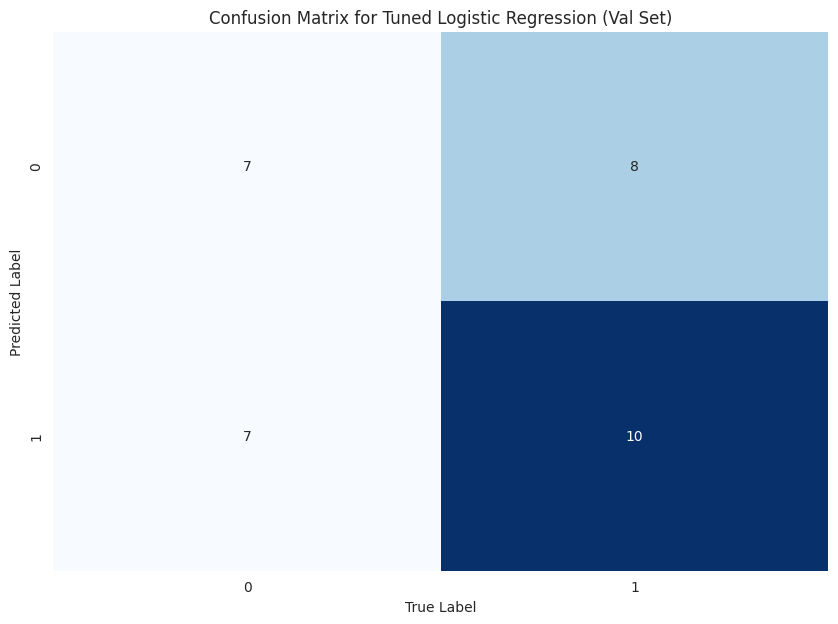

In [94]:
#Confusion Matrix for Tuned Logistic Regression Val Set
cm_rfc = confusion_matrix(y_val_13, lr_2.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned Logistic Regression (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [95]:
#Classification report Tuned Logistic Regression Test Set
print(classification_report(y_test_13, lr_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55        34
           1       0.53      0.63      0.58        30

    accuracy                           0.56        64
   macro avg       0.57      0.57      0.56        64
weighted avg       0.57      0.56      0.56        64



Text(95.72222222222221, 0.5, 'Predicted Label')

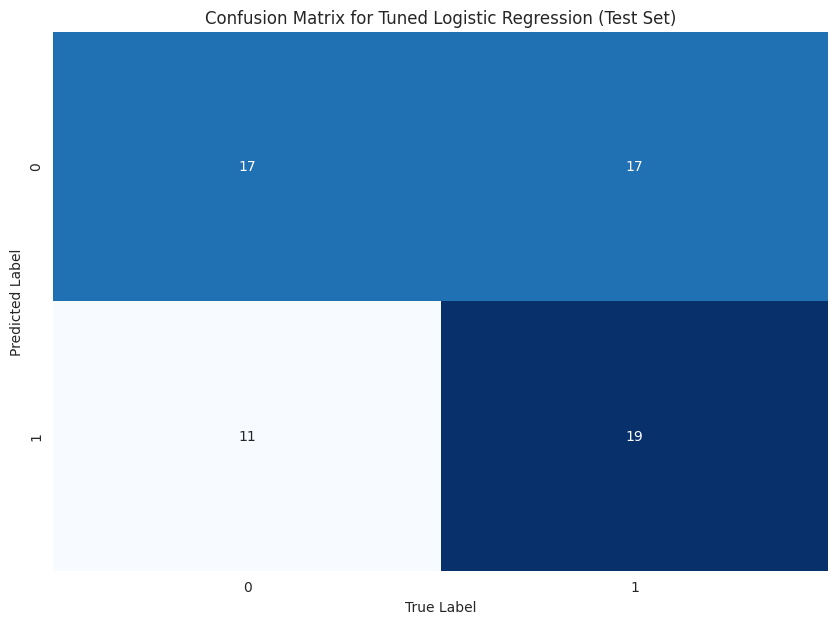

In [97]:
#Confusion Matrix for Tuned Logistic Regression Test Set 
cm_rfc = confusion_matrix(y_test_13, lr_2.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned Logistic Regression (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [99]:
#Running Decision Tree and Random Forest on the dataset as a last resort
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train_13)

DecisionTreeClassifier()

In [100]:
#Decision Tree Classification Report on Validation Set
print(classification_report(y_val_13, dtc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.45      0.33      0.38        15
           1       0.52      0.65      0.58        17

    accuracy                           0.50        32
   macro avg       0.49      0.49      0.48        32
weighted avg       0.49      0.50      0.49        32



Text(95.72222222222221, 0.5, 'Predicted Label')

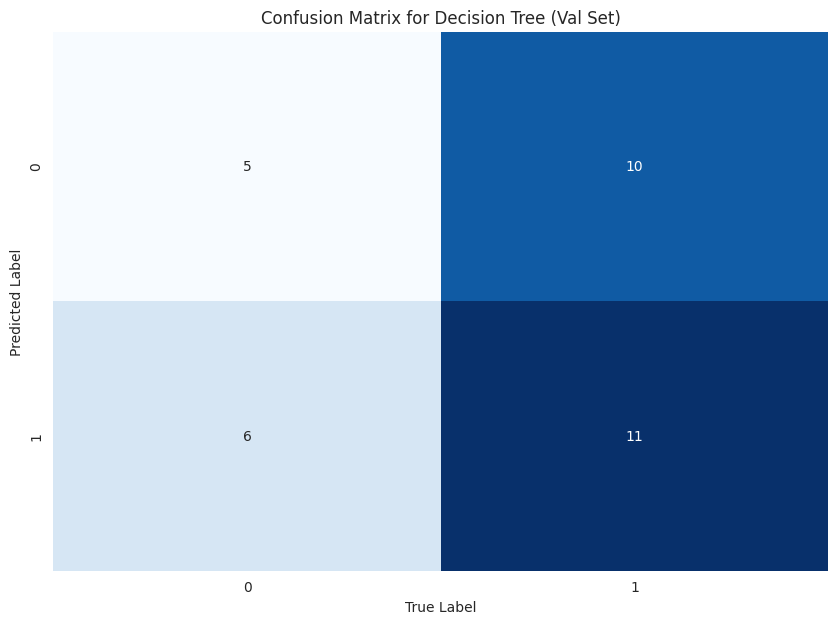

In [101]:
#Decision Tree Confusion Matrix on Val Set
cm_rfc = confusion_matrix(y_val_13, dtc.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Decision Tree (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [109]:
#Decision Tree Classification Report on TestSet
print(classification_report(y_test_13, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55        34
           1       0.53      0.63      0.58        30

    accuracy                           0.56        64
   macro avg       0.57      0.57      0.56        64
weighted avg       0.57      0.56      0.56        64



Text(95.72222222222221, 0.5, 'Predicted Label')

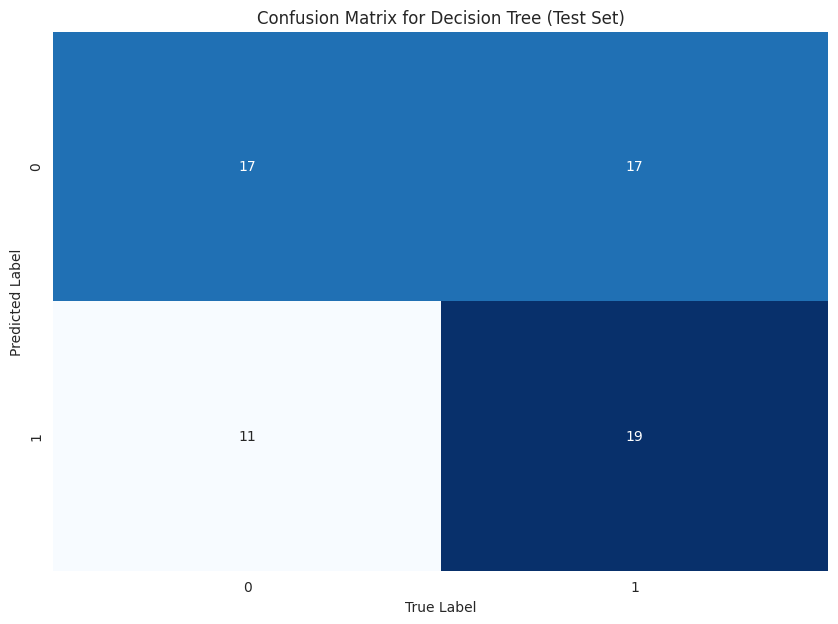

In [110]:
#Decision Tree Confusion Matrix on Test Set
cm_rfc = confusion_matrix(y_test_13, dtc.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Decision Tree (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [102]:
#Hyperparamter tuning for decision Tree
dtc_2 = DecisionTreeClassifier()
dtc_param_grid = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ['gini', 'entropy']}
gscv_dtc = GridSearchCV(estimator = dtc_2, param_grid = dtc_param_grid, cv = 5, n_jobs = -1)
gscv_dtc.fit(X_train, y_train_13)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [103]:
print(f'Best params for Decision Tree Classifier: {gscv_dtc.best_params_}')

Best params for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}


In [104]:
dtc_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 50)
dtc_2.fit(X_train, y_train_13)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50)

In [105]:
#Classification Report for Tuned Decision Tree Classifier Val Set
print(classification_report(y_val_13, dtc_2.predict(X_val)))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.63      0.71      0.67        17

    accuracy                           0.62        32
   macro avg       0.62      0.62      0.62        32
weighted avg       0.62      0.62      0.62        32



Text(95.72222222222221, 0.5, 'Predicted Label')

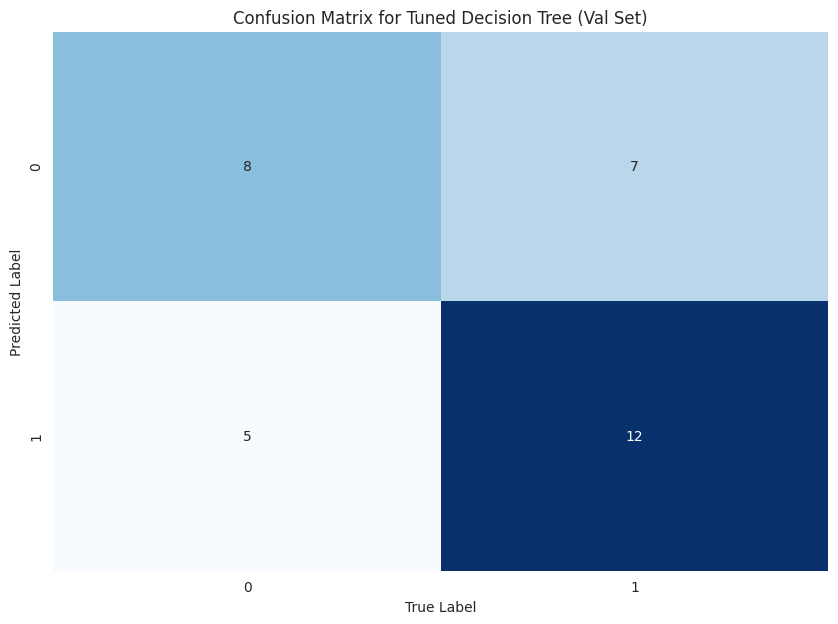

In [106]:
#Confusion Matrix for Tuned Decision Tree Classifier Val Set
cm_rfc = confusion_matrix(y_val_13, dtc_2.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned Decision Tree (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [107]:
#Classification Report for Tuned Decision Tree Classifier Test Set
print(classification_report(y_test_13, dtc_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.54      0.63      0.58        30

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64



Text(95.72222222222221, 0.5, 'Predicted Label')

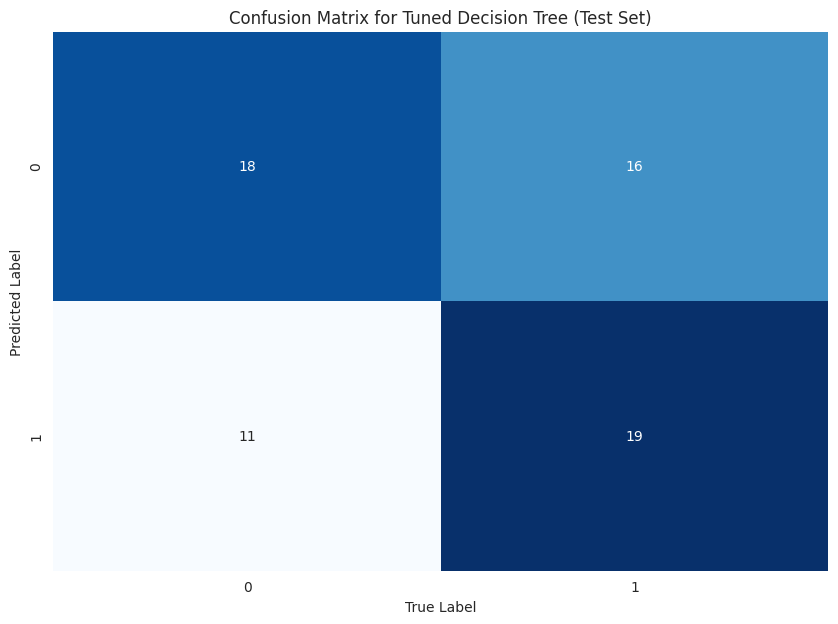

In [108]:
#Confusion Matrix for Tuned Decision Tree Classifier Test Set
cm_rfc = confusion_matrix(y_test_13, dtc_2.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned Decision Tree (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [111]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [112]:
#Classification report for Random Forest Val Set
print(classification_report(y_val_13, rfc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.60      0.88      0.71        17

    accuracy                           0.62        32
   macro avg       0.66      0.61      0.58        32
weighted avg       0.65      0.62      0.59        32



Text(95.72222222222221, 0.5, 'Predicted Label')

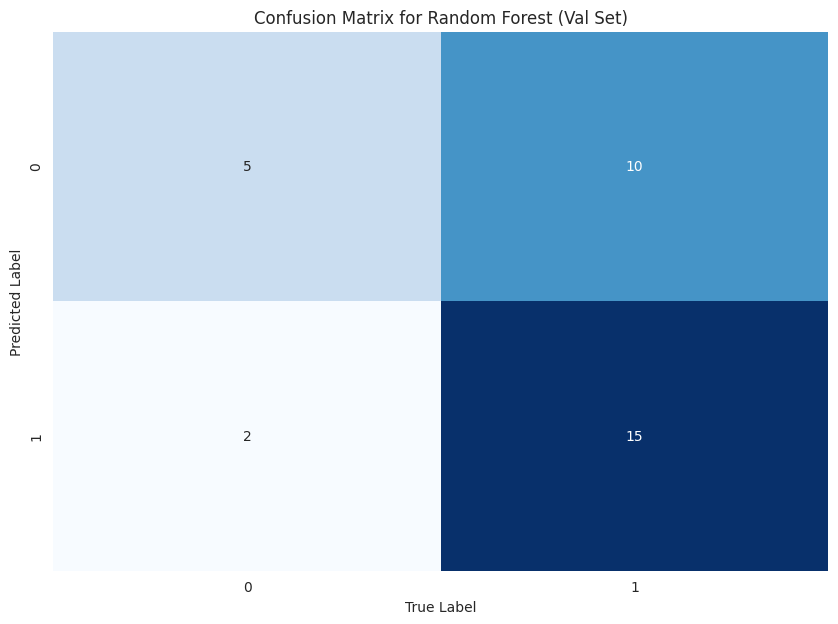

In [113]:
#Confusion Matrix for Random Forest Val Set
cm_rfc = confusion_matrix(y_val_13, rfc.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Random Forest (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [114]:
#Classification report for Random Forest Test Set
print(classification_report(y_test_13, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56        34
           1       0.54      0.67      0.60        30

    accuracy                           0.58        64
   macro avg       0.59      0.58      0.58        64
weighted avg       0.59      0.58      0.58        64



Text(95.72222222222221, 0.5, 'Predicted Label')

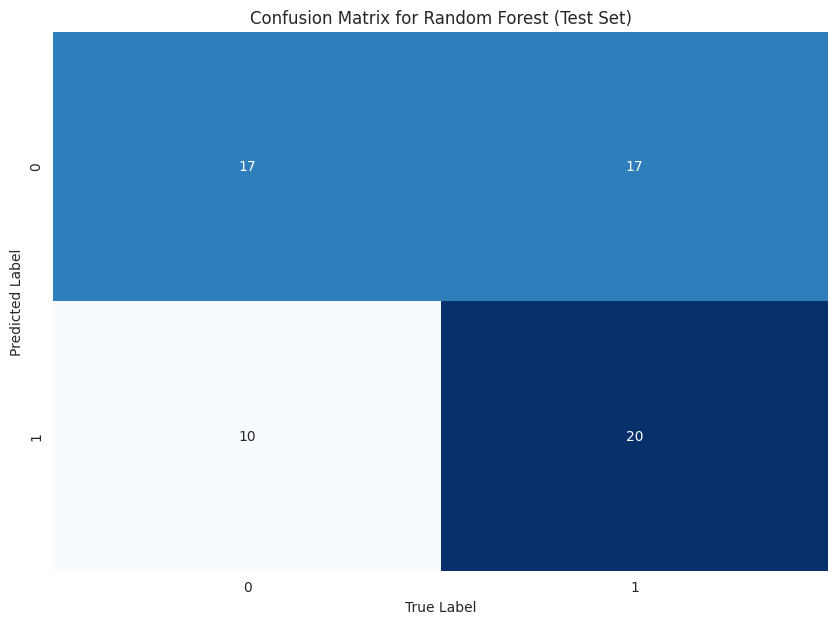

In [115]:
#Confusion Matrix for Random Forest Test Set
cm_rfc = confusion_matrix(y_test_13, rfc.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Random Forest (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [116]:
#Hyperparameter tuning for Random Forest Classifier
rfc_2 = RandomForestClassifier()
rfc_param_grid = {'n_estimators': [100, 200, 300, 500, 750, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}
gscv_rfc = GridSearchCV(estimator = rfc_2, param_grid = rfc_param_grid, cv = 5, n_jobs = -1)
gscv_rfc.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packag

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500, 750, 1000]})

In [117]:
print(f'Best parameters for Random Forest Classifier: {gscv_rfc.best_params_}')

Best parameters for Random Forest Classifier: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [118]:
rfc_2 = RandomForestClassifier(criterion = 'entropy', max_depth = 20, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 100)
rfc_2.fit(X_train, y_train_13)

/home/sanven0212/PycharmProjects/MultiOmicsFYP/.venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5)

In [119]:
#Classification Report for Tuned Random Forest Classifier Val Set
print(classification_report(y_val_13, rfc_2.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.64      0.94      0.76        17

    accuracy                           0.69        32
   macro avg       0.75      0.67      0.65        32
weighted avg       0.74      0.69      0.66        32



Text(95.72222222222221, 0.5, 'Predicted Label')

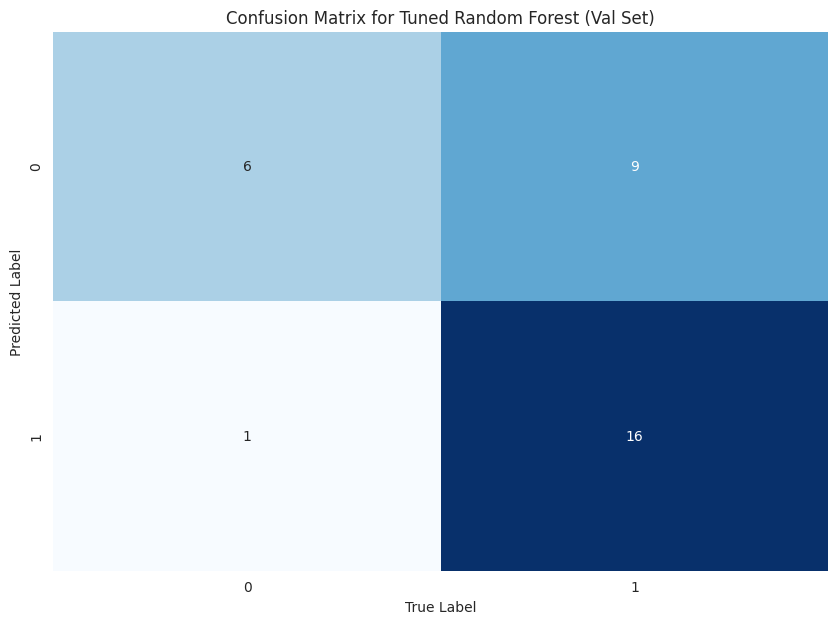

In [120]:
#Confusion Matrix Random Forest Classifier Val Set
cm_rfc = confusion_matrix(y_val_13, rfc_2.predict(X_val))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned Random Forest (Val Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [121]:
#Classification Report for Tuned Random Forest Classifier Test Set
print(classification_report(y_test_13, rfc_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63        34
           1       0.60      0.70      0.65        30

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.65      0.64      0.64        64



Text(95.72222222222221, 0.5, 'Predicted Label')

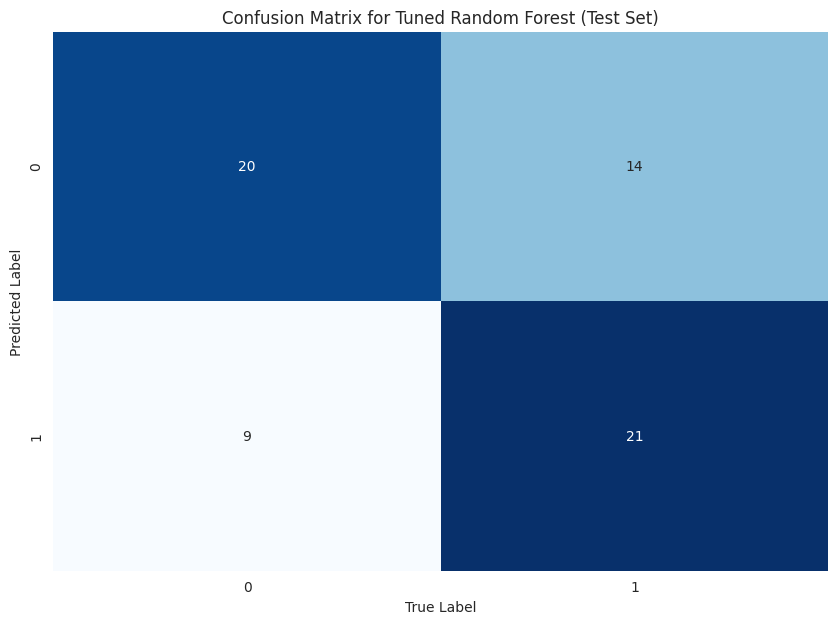

In [122]:
#Confusion Matrix Random Forest Classifier Test Set
cm_rfc = confusion_matrix(y_test_13, rfc_2.predict(X_test))
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Tuned Random Forest (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# **Maxvoting Classifier**
In this section the test predictions for all the 4 ANNs are obtained and the mode of the predictions is obtained i.e. the label that is predicted by a majority of the models for each sample

In [123]:
y_pred_1 = nn_model_1.predict(X_test)
y_pred_2 = nn_model_2.predict(X_test)
y_pred_3 = nn_model_3.predict(X_test)
y_pred_4 = nn_model_4.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [124]:
results_dict = {'model_1': tf.squeeze(y_pred_1), 'model_2': tf.squeeze(y_pred_2), 'model_3': tf.squeeze(y_pred_3), 'model_4': tf.squeeze(y_pred_4)}

In [125]:
results_df = pd.DataFrame(results_dict)

In [126]:
results_df

,model_1,model_2,model_3,model_4
0,0.217775,0.062333,0.251440,0.407369
1,0.901859,0.130606,0.543105,0.598040
2,0.132238,0.533614,0.253240,0.252746
3,0.478294,0.137629,0.832194,0.632908
4,0.846722,0.181380,0.506911,0.541870
...,...,...,...,...
59,0.053168,0.464288,0.134481,0.072049
60,0.908716,0.317518,0.706086,0.809416
61,0.865453,0.581909,0.319597,0.566750
62,0.312528,0.666187,0.634575,0.640559


In [127]:
results_df['model_1'] = results_df['model_1'].apply(lambda x: 1 if x > 0.5 else 0)
results_df['model_2'] = results_df['model_2'].apply(lambda x: 1 if x > 0.5 else 0)
results_df['model_3'] = results_df['model_3'].apply(lambda x: 1 if x > 0.5 else 0)
results_df['model_4'] = results_df['model_4'].apply(lambda x: 1 if x > 0.5 else 0)

In [128]:
results_df

,model_1,model_2,model_3,model_4
0,0,0,0,0
1,1,0,1,1
2,0,1,0,0
3,0,0,1,1
4,1,0,1,1
...,...,...,...,...
59,0,0,0,0
60,1,0,1,1
61,1,1,0,1
62,0,1,1,1


In [129]:
results_df['pred_label'] = results_df.apply(lambda x: x.mode()[0], axis = 1)

In [130]:
results_df

,model_1,model_2,model_3,model_4,pred_label
0,0,0,0,0,0
1,1,0,1,1,1
2,0,1,0,0,0
3,0,0,1,1,0
4,1,0,1,1,1
...,...,...,...,...,...
59,0,0,0,0,0
60,1,0,1,1,1
61,1,1,0,1,1
62,0,1,1,1,1


In [131]:
results_df['True_label'] = tf.squeeze(y_test_13)

In [132]:
results_df

,model_1,model_2,model_3,model_4,pred_label,True_label
0,0,0,0,0,0,0
1,1,0,1,1,1,0
2,0,1,0,0,0,0
3,0,0,1,1,0,1
4,1,0,1,1,1,1
...,...,...,...,...,...,...
59,0,0,0,0,0,1
60,1,0,1,1,1,1
61,1,1,0,1,1,0
62,0,1,1,1,1,1


In [133]:
print(classification_report(results_df['True_label'], results_df['pred_label']))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        34
           1       0.46      0.37      0.41        30

    accuracy                           0.50        64
   macro avg       0.49      0.49      0.49        64
weighted avg       0.49      0.50      0.49        64



Text(95.72222222222221, 0.5, 'Predicted Label')

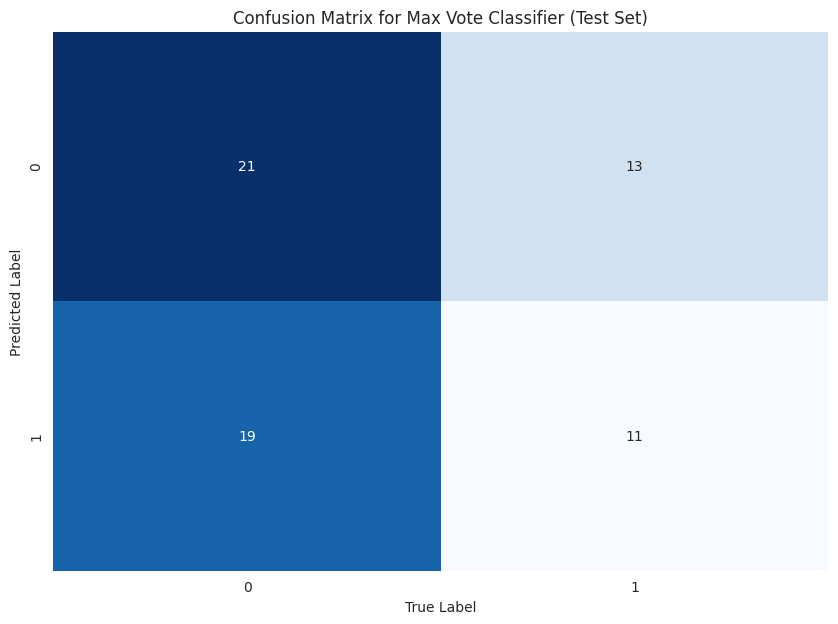

In [134]:
#Confusion Matrix for MaxVote Classifier on Test Set
cm_rfc = confusion_matrix(results_df['True_label'], results_df['pred_label'])
plt.figure(figsize = (10, 7))
sb.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['0', '1'], yticklabels = ['0', '1'], cbar = False)
plt.title('Confusion Matrix for Max Vote Classifier (Test Set)')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')